<a href="https://colab.research.google.com/github/gpensabem/Learnings/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [64]:
class DataAugmentation:
  def __init__(self, default_probability=0.5, transforms=None):
    self.transforms = transforms if transforms is not None else []
    self.functions = {'rotate': self.rotate, 'translate': self.translate, 'shear': self.shear, 'flip': self.flip, 'crop': self.crop, 'resize': self.resize, 'canny_edge_detection': self.canny_edge_detection, 'sobel_edge_detection': self.sobel_edge_detection, 'laplacian_edge_detection': self.laplacian_edge_detection, 'harris_corner_detection': self.harris_corner_detection, 'contrast': self.contrast, 'brightness': self.brightness, 'noise': self.noise}
    self.configs = {}
    self.default_probability = default_probability

  def add_transform(self, name, function, config=None):
    if name not in self.transforms:
      self.transforms.append(name)
      self.functions[name] = function
      self.configs[name] = config

  def set_transform_config(self, name, config):
    if name in self.transforms:
      self.configs[name] = config

  def apply(self, image):
    all_transforms = []
    applied_transform = []
    for transform in self.transforms:
      if np.random.rand()*100 < self.default_probability:
        # print(f"image {transform}")
        applied_transform.append(transform)
        image = self.functions[transform](image)
    all_transforms.append(applied_transform)
    return image, all_transforms

  def apply_batch(self, batch):
    batch_applied_transforms = []
    for i in range(len(batch)):
      batch[i], transforms = self.apply(batch[i])
      batch_applied_transforms.append(transforms)
    return batch, batch_applied_transforms

  def visualize(self, batch, num_samples=3, is_batch=True):
    if is_batch == False:
      plt.imshow(batch)
      plt.axis('off')
      return
    else:
      for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(batch[i])
        plt.axis('off')
    plt.show()

  def report(self, report, show_general_informations=False, show_each_image_details=False):
    if show_general_informations:
      print('Transforms: ', self.transforms)
      print('Functions: ', self.functions)
      print('Configs: ', self.configs)
      print('Default probability: ', self.default_probability)
      print('Number of transforms: ', len(self.transforms))
      print('Number of functions: ', len(self.functions))
      print('Number of configs: ', len(self.configs))

    if show_each_image_details:
      for i in range(len(report)):
          print(f"Image {i+1} transforms: {report[i]}.")



  def rotate(self, image):
    cols, rows = image.shape[:2]
    angle = self.configs['rotate']
    rotated_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, rotated_matrix, (cols, rows))

  def translate(self, image):
    x, y = self.configs['translate']
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

  def shear(self, image):
    x, y = self.configs['shear']
    M = np.float32([[1, x, 0], [y, 1, 0]])
    return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

  def flip(self, image):
    orientation = self.configs['flip']
    return cv2.flip(self.img, 1)

  #secondary functions to padronize sizes or cut images
  def crop(self, image):
    x1, y1, x2, y2 = self.configs['crop']
    return self.img[y1:y2, x1:x2]

  def resize(self, image):
    width, height = self.configs['resize']
    return cv2.resize(self.img, (width, height))


  #functions to find contours
  def canny_edge_detection(self, image):
    threshold1, threshold2 = self.configs['canny_edge_detection']
    return cv2.Canny(self.image, threshold1, threshold2)

  def sobel_edge_detection(self, image):
    dx, dy = self.configs['sobel_edge_detection']
    return cv2.Sobel(self.image, cv2.CV_64F, dx, dy, ksize=3)

  def laplacian_edge_detection(self, image):
    return cv2.Laplacian(self.image, cv2.CV_64F)

  def harris_corner_detection(self, image):
    gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    return cv2.cornerHarris(gray, 2, 3, 0.04)

  #functions to improve contrast or minor changes
  def contrast(self, image):
    alpha, beta = self.configs['contrast']
    return cv2.addWeighted(self.image, alpha, np.zeros(self.image.shape, self.image.dtype), 0, beta)

  def brightness(self, image):
    alpha, beta = self.configs['brightness']
    return cv2.addWeighted(self.img, alpha, np.zeros(self.img.shape, self.img.dtype), 0, beta)

  def noise(self, image):
    noise_factor = self.configs['noise']
    row, col, ch = self.img.shape
    gauss = np.random.randn(row, col, ch)
    gauss = gauss.reshape(row, col, ch)
    noisy = self.img + noise_factor * gauss
    return noisy



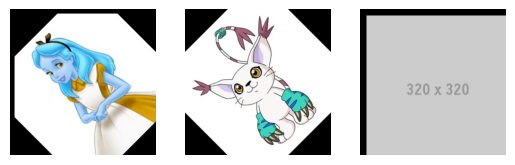

Image 1 transforms: [['rotate', 'translate', 'shear']].
Image 2 transforms: [['rotate', 'shear']].
Image 3 transforms: [['translate', 'shear']].


In [68]:
# batch = np.random.randint(0, 255, (10, 100, 100, 3))

img = cv2.imread('drive/MyDrive/images/c5251f720f6f092d76771ccb7316aee3.jpg', cv2.IMREAD_ANYCOLOR)
img1 = cv2.imread('drive/MyDrive/images/Tailmon_t.webp', cv2.IMREAD_ANYCOLOR)
img2 = cv2.imread('drive/MyDrive/images/images.png', cv2.IMREAD_ANYCOLOR)

batch = [img, img1, img2]

augmentor = DataAugmentation(default_probability=80)

augmentor.add_transform('rotate', augmentor.rotate, 45)
augmentor.add_transform('translate', augmentor.translate, (10, 10))
augmentor.add_transform('shear', augmentor.shear, (0.5, 0.5))

augmentor.set_transform_config('rotate', 45)
augmentor.set_transform_config('translate', (10, 10))
augmentor.set_transform_config('shear', (0.0, 0.0))

batch1, report1 = augmentor.apply_batch(batch)
augmentor.visualize(batch1)

# augmented_img, report1 = augmentor.apply(img)
# augmentor.visualize(augmented_img, is_batch=False)

augmentor.report(report1, show_general_informations=False, show_each_image_details=True)

In [ ]:
img.shape


In [ ]:
# Outras funções
  # def flip(self):
  #   return cv2.flip(self.img, 1)

  # def crop(self, x1, y1, x2, y2):
  #   return self.img[y1:y2, x1:x2]

  # def resize(self, width, height):
  #   return cv2.resize(self.img, (width, height))

  # # def blur(self, kernel_size):
  # #   return cv2.blur(self.img, (kernel_size, kernel_size))

  # # def gaussian_blur(self, kernel_size):
  # #   return cv2.GaussianBlur(self.img, (kernel_size, kernel_size), 0)

  # def threshold(self, threshold_value):
  #   _, threshold = cv2.threshold(self.img, threshold_value, 255, cv2.THRESH_BINARY)
  #   return threshold

  # def adaptive_threshold(self, block_size, constant):
  #   return cv2.adaptiveThreshold(self.img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant) # Adaptive Mean or Adaptive Gaussian are the best options

  # def dilation(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.dilate(self.img, kernel, iterations=1)

  # def erosion(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.erode(self.img, kernel, iterations=1)

  # def opening(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.morphologyEx(self.img, cv2.MORPH_OPEN, kernel)

  # def closing(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.morphologyEx(self.img, cv2.MORPH_CLOSE, kernel)

  # def gradient(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.morphologyEx(self.img, cv2.MORPH_GRADIENT, kernel)

  # def top_hat(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.morphologyEx(self.img, cv2.MORPH_TOPHAT, kernel)

  # def black_hat(self, kernel_size):
  #   kernel = np.ones((kernel_size, kernel_size), np.uint8)
  #   return cv2.morphologyEx(self.img, cv2.MORPH_BLACKHAT, kernel)

  # def distance_transform(self):
  #   return cv2.distanceTransform(self.img, cv2.DIST_L2, 3)

  # def color_space(self, color_space):
  #   if color_space == 'HSV':
  #     return cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)

  # def equalize_histogram(self):
  #   return cv2.equalizeHist(self.img)

  # def histogram_equalization(self):
  #   gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
  #   return cv2.equalizeHist(gray)

  # def adaptive_histogram_equalization(self):
  #   gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
  #   return cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(gray)


  # def data_separation(self):
  #   b, g, r = cv2.split(self.img)
  #   return b, g, r

  # def __str__(self):
  #   return str(self.img)